Disclaimer: Homework made up for educational purposes.
Dream Housing Finance company deals in all kinds of home loans. They have presence across all
urban, semi urban and rural areas. Customer first applies for home loan and after that company
validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail
provided while filling online application form. These details are Gender, Marital Status, Education,
Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process,
they have provided a dataset to identify the customers segments that are eligible for loan amount so
that they can specifically target these customers.

#### Variable Description
Loan_ID ___ Unique Loan ID<br>
Gender ___  Male/ Female<br>
Married ___  Applicant married (Y/N)<br>
Dependents ___  Number of dependents<br>
Education ___  Applicant Education (Graduate/ Under Graduate)<br>
Self_Employed ___  Self employed (Y/N)<br>
ApplicantIncome ___  Applicant income<br>
CoapplicantIncome Coapplicant income<br>
LoanAmount ___  Loan amount in thousands<br>
Loan_Amount_Term ___  Term of loan in months<br>
Credit_History ___  credit history meets guidelines<br>
Property_Area ___  Urban/ Semi Urban/ Rural<br>
Loan_Status ___  (Target) Loan approved (Y/N)<br><br>
Task: You are asked to predict loan eligibility using Ensemble Learning algorithms such as Voting,
BaggingClassifier, GradientBoostingClassifier, XGBClassifier, lightgbm, CatBoostClassifier.

In [149]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 2.1 MB/s eta 0:00:00


In [148]:
!pip install catboost

     -------------------------------------- 74.0/74.0 MB 883.9 kB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00


In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report


from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


from catboost import CatBoostRegressor
from lightgbm import LGBMClassifier

from xgboost import XGBClassifier


from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.filterwarnings('ignore')


pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [106]:
data=pd.read_csv('files/loan_prediction.csv')
df=data.copy()

In [107]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [108]:
df.shape

(614, 13)

In [109]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [110]:
df.duplicated().sum()

0

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [112]:
for x in df.columns:
    print(df[x].value_counts())


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: L

#### Handling na data

In [113]:
col_cat_with_na=['Gender','Married','Dependents','Self_Employed','Credit_History']

col_num_with_na=['LoanAmount','Loan_Amount_Term']

for x in col_cat_with_na:
    df[x].fillna(df[x].mode()[0],inplace=True)

    
for x in col_num_with_na:
    df[x].fillna(df[x].mean(),inplace=True)


df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Transformation

In [114]:
g_d=['Gender','Married','Self_Employed','Education','Credit_History']

for x in g_d:
    df[x]=pd.get_dummies(df[x],drop_first=True)
    
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,Urban,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,Rural,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,Urban,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,Urban,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,Urban,Y


In [115]:
a=pd.get_dummies(df['Property_Area'],drop_first=True)
b=pd.get_dummies(df['Dependents'],drop_first=True)
df=pd.concat([df, a,b],axis=1)
df.drop(['Loan_ID','Property_Area','Dependents'],inplace=True,axis=1)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban,1,2,3+
0,1,0,0,0,5849,0.0,146.412162,360.0,1,Y,0,1,0,0,0
1,1,1,0,0,4583,1508.0,128.000000,360.0,1,N,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1,Y,0,1,0,0,0
3,1,1,1,0,2583,2358.0,120.000000,360.0,1,Y,0,1,0,0,0
4,1,0,0,0,6000,0.0,141.000000,360.0,1,Y,0,1,0,0,0


#### outlier checking

[None]

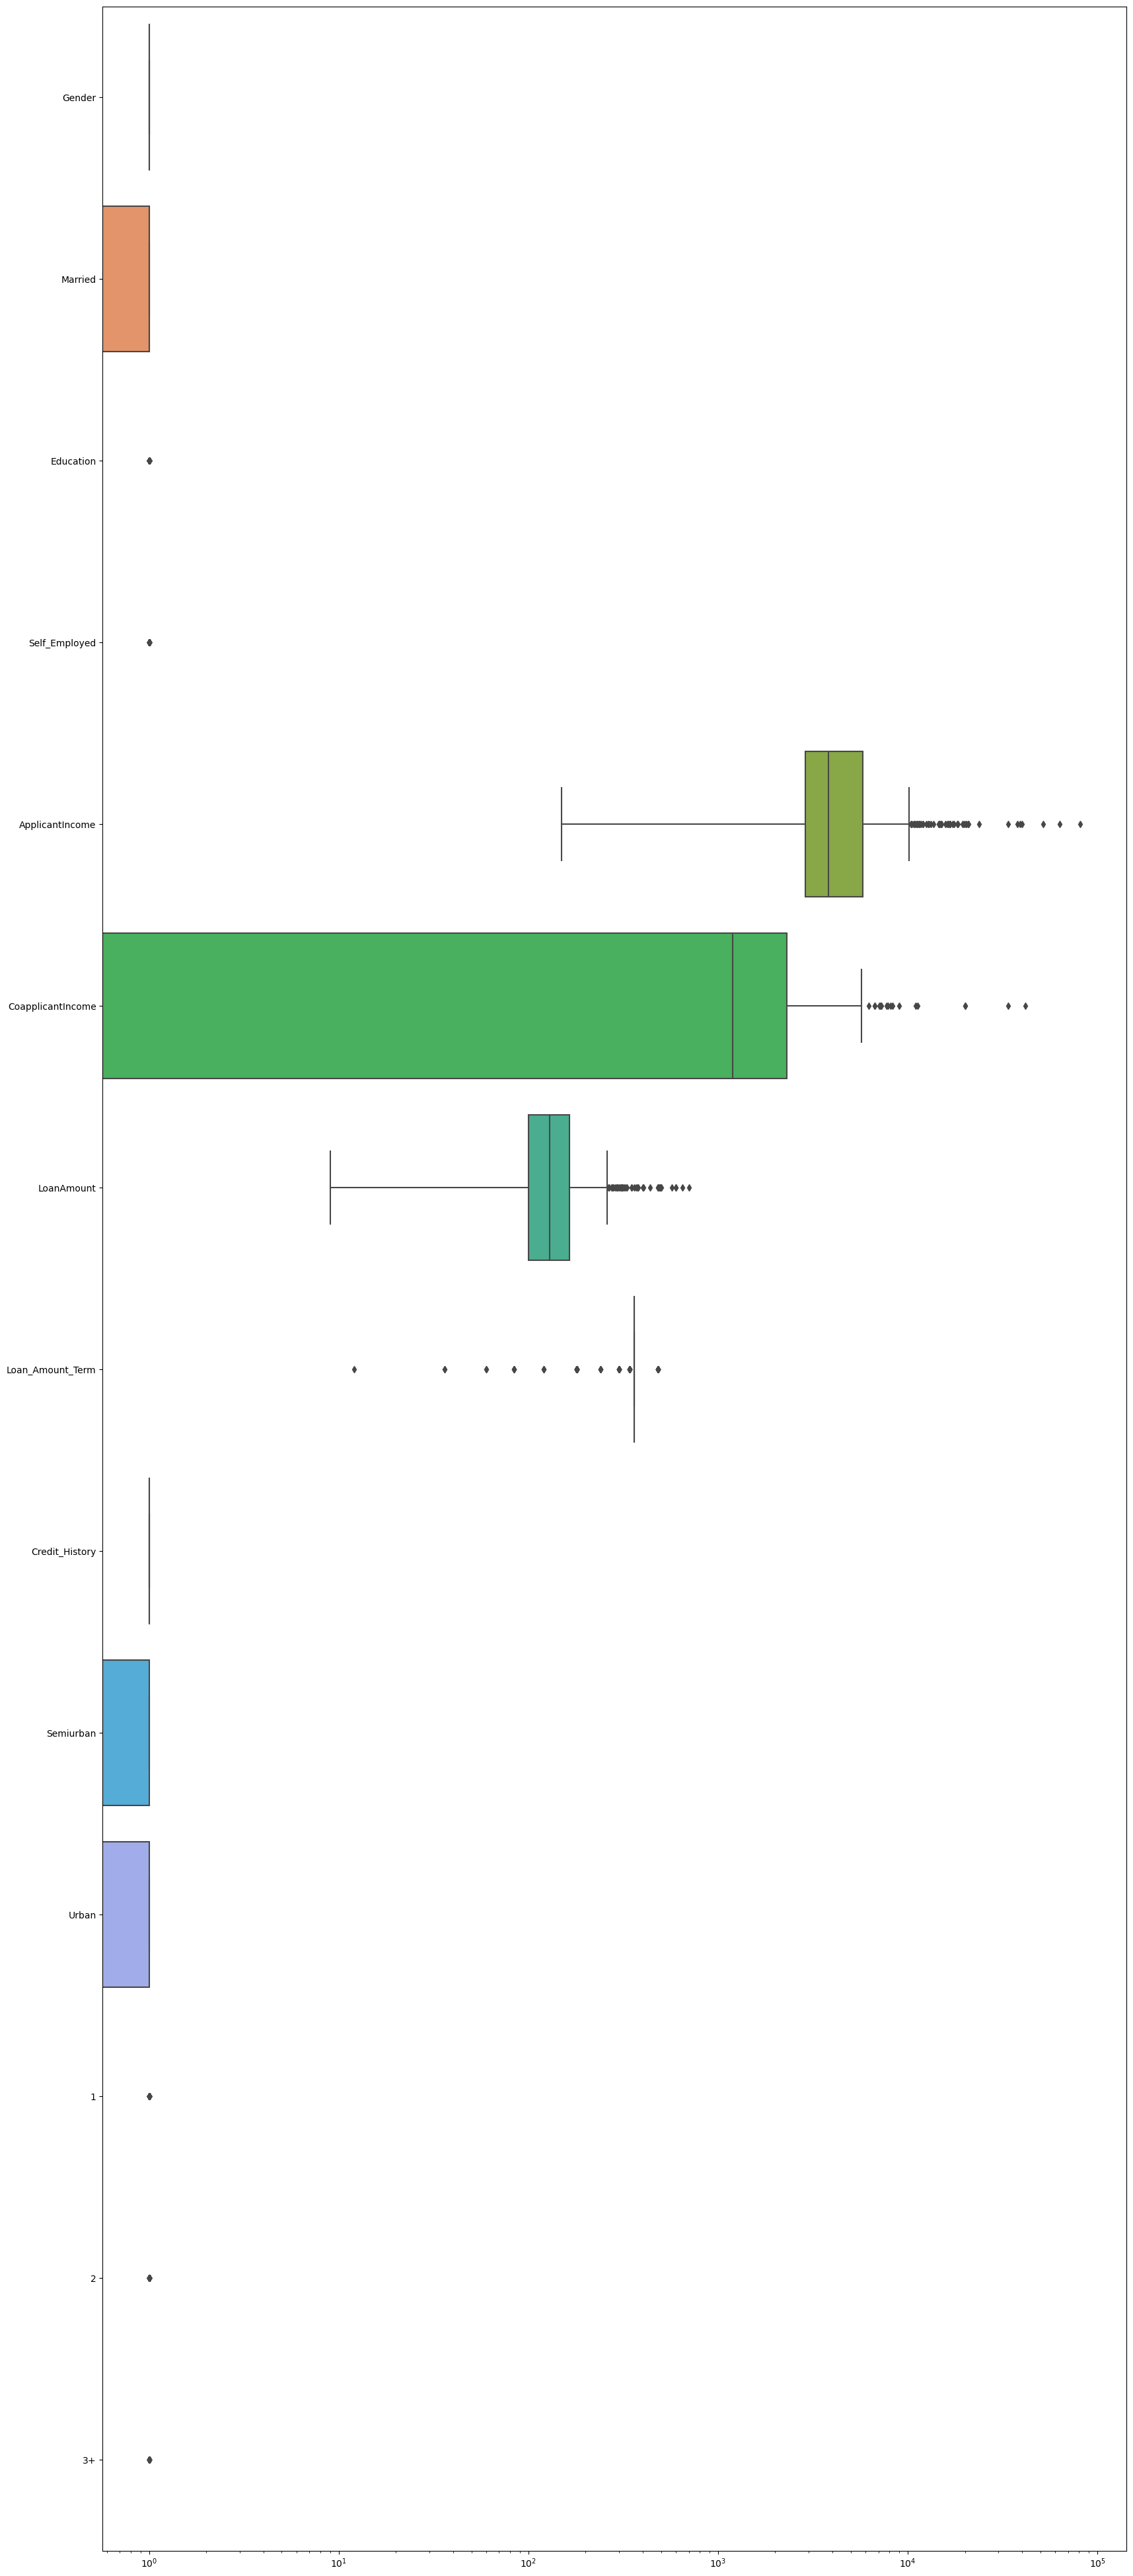

In [116]:
plt.figure(figsize=(20,50))
ax=sns.boxplot(data=df,orient='h')
ax.set(xscale='log')

#### Scaling

In [119]:
y=df['Loan_Status']
X=df.drop('Loan_Status',axis=1)
scaler=RobustScaler()
X.iloc[:,:]=scaler.fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=2, stratify=y)

Voting, BaggingClassifier, GradientBoostingClassifier, XGBClassifier, lightgbm, CatBoostClassifier.

#### inbalance problemi yoxdur

In [121]:
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Voting

In [124]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train);

model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)

print(model1.__class__.__name__ ,'\n', classification_report(y_test, model1_pred))
print(model2.__class__.__name__ ,'\n', classification_report(y_test, model2_pred))
print(model3.__class__.__name__ ,'\n', classification_report(y_test, model3_pred))

LogisticRegression 
               precision    recall  f1-score   support

           N       0.82      0.47      0.60        38
           Y       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123

DecisionTreeClassifier 
               precision    recall  f1-score   support

           N       0.58      0.66      0.62        38
           Y       0.84      0.79      0.81        85

    accuracy                           0.75       123
   macro avg       0.71      0.72      0.71       123
weighted avg       0.76      0.75      0.75       123

SVC 
               precision    recall  f1-score   support

           N       0.50      0.03      0.05        38
           Y       0.69      0.99      0.82        85

    accuracy                           0.69       123
   macro avg       0.60      0.51      0.43       123
weighted avg       0.6

#### Hard

In [129]:
estimators = [('lr', model1), ('dt', model2) , ('svm', model3) ] 
voting_hard = VotingClassifier(estimators, voting="hard")
voting_hard.fit(X_train, y_train)
voting_hard_pred = voting_hard.predict(X_test)
print(classification_report(y_test, voting_hard_pred))

              precision    recall  f1-score   support

           N       0.80      0.42      0.55        38
           Y       0.79      0.95      0.86        85

    accuracy                           0.79       123
   macro avg       0.79      0.69      0.71       123
weighted avg       0.79      0.79      0.77       123



#### Soft

In [131]:
model4 = SVC(probability=True) 
estimators = [('lr', model1), ('dt', model2) , ('svm', model4) ] 
voting_soft = VotingClassifier(estimators, voting="soft")
voting_soft = VotingClassifier(estimators, voting="soft")
voting_soft.fit(X_train, y_train)
voting_soft_pred = voting_soft.predict(X_test)
print(classification_report(y_test, voting_soft_pred))

              precision    recall  f1-score   support

           N       0.61      0.50      0.55        38
           Y       0.79      0.86      0.82        85

    accuracy                           0.75       123
   macro avg       0.70      0.68      0.69       123
weighted avg       0.74      0.75      0.74       123



###  BaggingClassifier

In [132]:
svm = SVC(probability=True)
bag = BaggingClassifier(base_estimator= svm,
                 n_estimators = 10,
                 max_samples = 0.4,
                 max_features = 12,
                 bootstrap = True,
                 bootstrap_features = True,
                 n_jobs = -1,
                 random_state = 2)
bag_pred = bag.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, bag_pred ))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123



###  GradientBoostingClassifier

In [133]:
gbm = GradientBoostingClassifier(random_state = 2)
gbm_pred = gbm.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, gbm_pred ))

              precision    recall  f1-score   support

           N       0.76      0.42      0.54        38
           Y       0.78      0.94      0.86        85

    accuracy                           0.78       123
   macro avg       0.77      0.68      0.70       123
weighted avg       0.78      0.78      0.76       123



### XGBoost Classifier

In [144]:
y=pd.get_dummies(df['Loan_Status'],drop_first=True)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=2, stratify=y)

xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 2)
xgbt_pred = xgbt.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, xgbt_pred ))
print('\n\n')
print(xgbt.score(X_train, y_train))
print(xgbt.score(X_test, y_test))

[05:01:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimarors" } are not used.

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        38
           1       0.80      0.92      0.86        85

    accuracy                           0.79       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.78      0.79      0.78       123




0.8594704684317719
0.7886178861788617


### Lightgbm

In [157]:
y=pd.get_dummies(df['Loan_Status'],drop_first=True)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=2, stratify=y)


lgxb = LGBMClassifier()

lgxb_pred = lgxb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, lgxb_pred ))
print('\n\n')
print(lgxb.score(X_train, y_train))
print(lgxb.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.61      0.53      0.56        38
           1       0.80      0.85      0.82        85

    accuracy                           0.75       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.74      0.75      0.74       123




0.9979633401221996
0.7479674796747967


### CatBoost

In [152]:
y=pd.get_dummies(df['Loan_Status'],drop_first=True)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=2, stratify=y)

catb = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)

catb_pred = catb.fit(X_train, y_train).predict(X_test)

print('\n\n')
print(catb.score(X_train, y_train))
print(catb.score(X_test, y_test))

0:	learn: 0.3885298	total: 668us	remaining: 668us
1:	learn: 0.3851115	total: 1.65ms	remaining: 0us



-622.958529443225
-160.914553331487
